# 深度卷积神经网络（AlexNet）
:label:`sec_alexnet`

在LeNet提出后，卷积神经网络在计算机视觉和机器学习领域中很有名气。但卷积神经网络并没有主导这些领域。这是因为虽然LeNet在小数据集上取得了很好的效果，但是在更大、更真实的数据集上训练卷积神经网络的性能和可行性还有待研究。事实上，在上世纪90年代初到2012年之间的大部分时间里，神经网络往往被其他机器学习方法超越，如支持向量机（support vector machines）。

在计算机视觉中，直接将神经网络与其他机器学习方法进行比较也许不公平。这是因为，卷积神经网络的输入是由原始像素值或是经过简单预处理（例如居中、缩放）的像素值组成的。但在使用传统机器学习方法时，从业者永远不会将原始像素作为输入。在传统机器学习方法中，计算机视觉流水线是由经过人的手工精心设计的特征流水线组成的。对于这些传统方法，大部分的进展都来自于对特征有了更聪明的想法，并且学习到的算法往往归于事后的解释。

虽然上世纪90年代就有了一些神经网络加速卡，但仅靠它们还不足以开发出有大量参数的深层多通道多层卷积神经网络。此外，当时的数据集仍然相对较小。除了这些障碍，训练神经网络的一些关键技巧仍然缺失，包括启发式参数初始化、随机梯度下降的变体、非挤压激活函数和有效的正则化技术。

因此，与训练*端到端*（从像素到分类结果）系统不同，经典机器学习的流水线看起来更像下面这样：

1. 获取一个有趣的数据集。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万像素）。
2. 根据光学、几何学、其他知识以及偶然的发现，手工对特征数据集进行预处理。
3. 通过标准的特征提取算法，如SIFT（尺度不变特征变换） :cite:`Lowe.2004`和SURF（加速鲁棒特征） :cite:`Bay.Tuytelaars.Van-Gool.2006`或其他手动调整的流水线来输入数据。
4. 将提取的特征送入最喜欢的分类器中（例如线性模型或其它核方法），以训练分类器。

当人们和机器学习研究人员交谈时，会发现机器学习研究人员相信机器学习既重要又美丽：优雅的理论去证明各种模型的性质。机器学习是一个正在蓬勃发展、严谨且非常有用的领域。然而，当人们和计算机视觉研究人员交谈，会听到一个完全不同的故事。计算机视觉研究人员会告诉一个诡异事实————推动领域进步的是数据特征，而不是学习算法。计算机视觉研究人员相信，从对最终模型精度的影响来说，更大或更干净的数据集、或是稍微改进的特征提取，比任何学习算法带来的进步要大得多。

## 学习表征

另一种预测这个领域发展的方法————观察图像特征的提取方法。在2012年前，图像特征都是机械地计算出来的。事实上，设计一套新的特征函数、改进结果，并撰写论文是盛极一时的潮流。SIFT :cite:`Lowe.2004`、SURF :cite:`Bay.Tuytelaars.Van-Gool.2006`、HOG（定向梯度直方图） :cite:`Dalal.Triggs.2005`、[bags of visual words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision)和类似的特征提取方法占据了主导地位。

另一组研究人员，包括Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng、Shun ichi Amari和Juergen Schmidhuber，想法则与众不同：他们认为特征本身应该被学习。此外，他们还认为，在合理地复杂性前提下，特征应该由多个共同学习的神经网络层组成，每个层都有可学习的参数。在机器视觉中，最底层可能检测边缘、颜色和纹理。事实上，Alex Krizhevsky、Ilya Sutskever和Geoff Hinton提出了一种新的卷积神经网络变体*AlexNet*。在2012年ImageNet挑战赛中取得了轰动一时的成绩。AlexNet以Alex Krizhevsky的名字命名，他是论文 :cite:`Krizhevsky.Sutskever.Hinton.2012`的第一作者。

有趣的是，在网络的最底层，模型学习到了一些类似于传统滤波器的特征抽取器。 :numref:`fig_filters`是从AlexNet论文 :cite:`Krizhevsky.Sutskever.Hinton.2012`复制的，描述了底层图像特征。

![AlexNet第一层学习到的特征抽取器。](../img/filters.png)
:width:`400px`
:label:`fig_filters`

AlexNet的更高层建立在这些底层表示的基础上，以表示更大的特征，如眼睛、鼻子、草叶等等。而更高的层可以检测整个物体，如人、飞机、狗或飞盘。最终的隐藏神经元可以学习图像的综合表示，从而使属于不同类别的数据易于区分。尽管一直有一群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然而很长一段时间里这些尝试都未有突破。深度卷积神经网络的突破出现在2012年。突破可归因于两个关键因素。

### 缺少的成分：数据

包含许多特征的深度模型需要大量的有标签数据，才能显著优于基于凸优化的传统方法（如线性方法和核方法）。
然而，限于早期计算机有限的存储和90年代有限的研究预算，大部分研究只基于小的公开数据集。例如，不少研究论文基于加州大学欧文分校（UCI）提供的若干个公开数据集，其中许多数据集只有几百至几千张在非自然环境下以低分辨率拍摄的图像。这一状况在2010年前后兴起的大数据浪潮中得到改善。2009年，ImageNet数据集发布，并发起ImageNet挑战赛：要求研究人员从100万个样本中训练模型，以区分1000个不同类别的对象。ImageNet数据集由斯坦福教授李飞飞小组的研究人员开发，利用谷歌图像搜索（Google Image Search）对每一类图像进行预筛选，并利用亚马逊众包（Amazon Mechanical Turk）来标注每张图片的相关类别。这种规模是前所未有的。这项被称为ImageNet的挑战赛推动了计算机视觉和机器学习研究的发展，挑战研究人员确定哪些模型能够在更大的数据规模下表现最好。

### 缺少的成分：硬件

深度学习对计算资源要求很高，训练可能需要数百个迭代轮数，每次迭代都需要通过代价高昂的许多线性代数层传递数据。这也是为什么在20世纪90年代至21世纪初，优化凸目标的简单算法是研究人员的首选。然而，用GPU训练神经网络改变了这一格局。*图形处理器*（Graphics Processing Unit，GPU）早年用来加速图形处理，使电脑游戏玩家受益。GPU可优化高吞吐量的$4 \times 4$矩阵和向量乘法，从而服务于基本的图形任务。幸运的是，这些数学运算与卷积层的计算惊人地相似。由此，英伟达（NVIDIA）和ATI已经开始为通用计算操作优化gpu，甚至把它们作为*通用GPU*（general-purpose GPUs，GPGPU）来销售。

那么GPU比CPU强在哪里呢？

首先，我们深度理解一下中央处理器（Central Processing Unit，CPU）的*核心*。
CPU的每个核心都拥有高时钟频率的运行能力，和高达数MB的三级缓存（L3Cache）。
它们非常适合执行各种指令，具有分支预测器、深层流水线和其他使CPU能够运行各种程序的功能。
然而，这种明显的优势也是它的致命弱点：通用核心的制造成本非常高。
它们需要大量的芯片面积、复杂的支持结构（内存接口、内核之间的缓存逻辑、高速互连等等），而且它们在任何单个任务上的性能都相对较差。
现代笔记本电脑最多有4核，即使是高端服务器也很少超过64核，因为它们的性价比不高。

相比于CPU，GPU由$100 \sim 1000$个小的处理单元组成（NVIDIA、ATI、ARM和其他芯片供应商之间的细节稍有不同），通常被分成更大的组（NVIDIA称之为warps）。
虽然每个GPU核心都相对较弱，有时甚至以低于1GHz的时钟频率运行，但庞大的核心数量使GPU比CPU快几个数量级。
例如，NVIDIA最近一代的Ampere GPU架构为每个芯片提供了高达312 TFlops的浮点性能，而CPU的浮点性能到目前为止还没有超过1 TFlops。
之所以有如此大的差距，原因其实很简单：首先，功耗往往会随时钟频率呈二次方增长。
对于一个CPU核心，假设它的运行速度比GPU快4倍，但可以使用16个GPU核代替，那么GPU的综合性能就是CPU的$16 \times 1/4 = 4$倍。
其次，GPU内核要简单得多，这使得它们更节能。
此外，深度学习中的许多操作需要相对较高的内存带宽，而GPU拥有10倍于CPU的带宽。

回到2012年的重大突破，当Alex Krizhevsky和Ilya Sutskever实现了可以在GPU硬件上运行的深度卷积神经网络时，一个重大突破出现了。他们意识到卷积神经网络中的计算瓶颈：卷积和矩阵乘法，都是可以在硬件上并行化的操作。
于是，他们使用两个显存为3GB的NVIDIA GTX580 GPU实现了快速卷积运算。他们的创新[cuda-convnet](https://code.google.com/archive/p/cuda-convnet/)几年来它一直是行业标准，并推动了深度学习热潮。

## AlexNet

2012年，AlexNet横空出世。它首次证明了学习到的特征可以超越手工设计的特征。它一举打破了计算机视觉研究的现状。
AlexNet使用了8层卷积神经网络，并以很大的优势赢得了2012年ImageNet图像识别挑战赛。

AlexNet和LeNet的架构非常相似，如 :numref:`fig_alexnet`所示。
注意，本书在这里提供的是一个稍微精简版本的AlexNet，去除了当年需要两个小型GPU同时运算的设计特点。

![从LeNet（左）到AlexNet（右）](../img/alexnet.svg)
:label:`fig_alexnet`

AlexNet和LeNet的设计理念非常相似，但也存在显著差异。

1. AlexNet比相对较小的LeNet5要深得多。AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。
2. AlexNet使用ReLU而不是sigmoid作为其激活函数。

下面的内容将深入研究AlexNet的细节。

### 模型设计

在AlexNet的第一层，卷积窗口的形状是$11\times11$。
由于ImageNet中大多数图像的宽和高比MNIST图像的多10倍以上，因此，需要一个更大的卷积窗口来捕获目标。
第二层中的卷积窗口形状被缩减为$5\times5$，然后是$3\times3$。
此外，在第一层、第二层和第五层卷积层之后，加入窗口形状为$3\times3$、步幅为2的最大汇聚层。
而且，AlexNet的卷积通道数目是LeNet的10倍。

在最后一个卷积层后有两个全连接层，分别有4096个输出。
这两个巨大的全连接层拥有将近1GB的模型参数。
由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。
幸运的是，现在GPU显存相对充裕，所以现在很少需要跨GPU分解模型（因此，本书的AlexNet模型在这方面与原始论文稍有不同）。

### 激活函数

此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。
一方面，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。
另一方面，当使用不同的参数初始化方法时，ReLU激活函数使训练模型更加容易。
当sigmoid激活函数的输出非常接近于0或1时，这些区域的梯度几乎为0，因此反向传播无法继续更新一些模型参数。
相反，ReLU激活函数在正区间的梯度总是1。
因此，如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到几乎为0的梯度，从而使模型无法得到有效的训练。

### 容量控制和预处理

AlexNet通过暂退法（ :numref:`sec_dropout`）控制全连接层的模型复杂度，而LeNet只使用了权重衰减。
为了进一步扩充数据，AlexNet在训练时增加了大量的图像增强数据，如翻转、裁切和变色。
这使得模型更健壮，更大的样本量有效地减少了过拟合。
在 :numref:`sec_image_augmentation`中更详细地讨论数据扩增。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l
import time
import numpy as np
import subprocess
import time

net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

# 图片大小为224*224，核大小为11，步幅为4，填充为1，输出通道为96，每次输出的大小为
# (224-11+4*1)/4+1=54，即54*54*96，参数数量为(11*11*1+1)*96=11712
# 接下来输入通道为96，输出通道为256，核大小为5，填充为2，步幅为1，输出大小为
# (54-5+2*2)/1+1=27，即27*27*256，参数数量为(5*5*96+1)*256=614656
# 接下来输入通道为256，输出通道为384，核大小为3，填充为1，步幅为1，输出大小为
# (27-3+2*1)/1+1=27，即27*27*384，参数数量为(3*3*256+1)*384=885120
# 接下来输入通道为384，输出通道为384，核大小为3，填充为1，步幅为1，输出大小为
# (27-3+2*1)/1+1=27，即27*27*384，参数数量为(3*3*384+1)*384=1327488
# 接下来输入通道为384，输出通道为256，核大小为3，填充为1，步幅为1，输出大小为
# (27-3+2*1)/1+1=27，即27*27*256，参数数量为(3*3*384+1)*256=884992
# 卷积层参数数量为11712+614656+885120+1327488+884992=3712968
# 卷积层能源消耗值为2.32957448e+01J

[**我们构造一个**]高度和宽度都为224的(**单通道数据，来观察每一层输出的形状**)。
它与 :numref:`fig_alexnet`中的AlexNet架构相匹配。


In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 读取数据集

尽管原文中AlexNet是在ImageNet上进行训练的，但本书在这里使用的是Fashion-MNIST数据集。因为即使在现代GPU上，训练ImageNet模型，同时使其收敛可能需要数小时或数天的时间。
将AlexNet直接应用于Fashion-MNIST的一个问题是，[**Fashion-MNIST图像的分辨率**]（$28 \times 28$像素）(**低于ImageNet图像。**)
为了解决这个问题，(**我们将它们增加到$224 \times 224$**)（通常来讲这不是一个明智的做法，但在这里这样做是为了有效使用AlexNet架构）。
这里需要使用`d2l.load_data_fashion_mnist`函数中的`resize`参数执行此调整。


In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
# print the shape of the train_iter
list_of_i = []
for i, (X, y) in enumerate(train_iter):
    list_of_i.append(i)

print('the shape of the train_iter is:', np.array(list_of_i).shape)
# print(list_of_i)
# print the first 10 batch of the train_iter
for i, (X, y) in enumerate(train_iter):
    if i < 10:
        print('the shape of the', i, 'batch of the train_iter is:', X.shape)
    else:
        break

the shape of the train_iter is: (469,)
the shape of the 0 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 1 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 2 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 3 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 4 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 5 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 6 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 7 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 8 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 9 batch of the train_iter is: torch.Size([128, 1, 224, 224])


## [**训练AlexNet**]

现在AlexNet可以开始被训练了。与 :numref:`sec_lenet`中的LeNet相比，这里的主要变化是使用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高，训练卷积神经网络就更昂贵。


In [4]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """使用GPU计算模型在数据集上的精度
    Defined in :numref:`sec_lenet`"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT微调所需的（之后将介绍）
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]

In [5]:
def test_loop(data_iter, net, loss_fn, device):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    net.eval()
    size = len(data_iter.dataset)
    num_batches = len(data_iter)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in data_iter:
            X = X.to(device)
            y = y.to(device)

            acc = d2l.accuracy(net(X), y)
            size = d2l.size(y)
    return acc/size
    #         pred = net(X)
    #         test_loss += loss_fn(pred, y).item()
    #         correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # test_loss /= num_batches
    # correct /= size
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [6]:
# '''
# 这段是将d2l中的train_ch6()函数拷贝过来，然后修改了一下，目的是为了能够显示在进行每一层的前向传播的时候，能够显示出来
# '''
# def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
#     """用GPU训练模型(在第六章定义)

#     Defined in :numref:`sec_lenet`"""
#     def init_weights(m):
#         if type(m) == nn.Linear or type(m) == nn.Conv2d:
#             nn.init.xavier_uniform_(m.weight)
#     net.apply(init_weights)

#     list_layer_name = ['Conv2d','ReLU', 'MaxPool2d','Linear','Dropout','Flatten']

#     # create a numpy array to store the time and energy, the shape is (num_epochs, len(list_layer_name), 2)
#     # the 2 means time and energy, respectively
#     time_energy_data = np.zeros((num_epochs, len(list_layer_name), 2)) # for epoch = 1, the shape is (6,2)

#     # create another numpy array to store the time and energy for loss, backward and optimizer
#     # the shape is (num_epochs, 3)
#     time_energy_data_loss_backward_optimizer = np.zeros((num_epochs, 3))

#     print('training on', device)
#     net.to(device)
#     optimizer = torch.optim.SGD(net.parameters(), lr=lr)
#     loss = nn.CrossEntropyLoss()
#     animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
#                             legend=['train loss', 'train acc', 'test acc'])
#     timer, num_batches = d2l.Timer(), len(train_iter)
#     for epoch in range(num_epochs):
#         # 训练损失之和，训练准确率之和，样本数
#         metric = d2l.Accumulator(3)
#         net.train() # 设置为训练模式

#         # 将time_energy_data的第一个维度设置为epoch
#         time_energy_data[epoch,:,:] = epoch

#         # 将time_energy_data_backward_optimizer的第一个维度设置为epoch
#         time_energy_data_loss_backward_optimizer[epoch,:] = epoch

#         for i, (X, y) in enumerate(train_iter):
#             timer.start()
#             optimizer.zero_grad()
#             X, y = X.to(device), y.to(device)

#             # 增加一个time_energy_data_i, 用于记录每一次前向传播的时间和能量
#             time_energy_data_i = np.zeros((len(list_layer_name),2))

#             # 增加一个time_energy_data_backward_optimizer_i, 用于记录每一次backward和optimizer的时间和能量
#             time_energy_data_loss_backward_optimizer_i = np.zeros((3))

#             # 将原本的y_hat = net(X)改为下面的形式，目的是为了让模型逐层运行，并且在这个过程中，记录起运行的时间以及消耗的能量
#             y_hat = X
#             for layer in net:
                
#                 # print(layer.__class__.__name__,'output shape:\t',y_hat.shape)
#                 layer_name = layer.__class__.__name__
#                 # print(layer_name)
#                 # # check if the layer_name is in the list_layer_name，if yes, then act the code below, else, continue
#                 # if layer_name in list_layer_name:
#                 # find out the layer name is in where of the list
#                 layer_index = list_layer_name.index(layer_name)
                
#                 # calculate the energy and time
#                 # 这里的时间和能量都是在每一层的前向传播的时候，进行计算的
#                 time_start_layer = time.time()
#                 '''
#                 energy部分后续加入，先进行测试时间计算
#                 '''
#                 # energy_start = 0
#                 y_hat = layer(y_hat)
#                 time_end_layer = time.time()
#                 time_cost_layer = time_end_layer - time_start_layer
#                 # 将对应的layer_index的时间和能量加入到time_energy_data中
#                 time_energy_data_i[layer_index,0] += time_cost_layer
#                 # time_energy_data_i[layer_index,1] += energy_cost_layer

#                 # print(layer_name, 'time %f sec' % (time_cost_layer))
#                 # print(time_energy_data_i)
            
#             # 将time_energy_data_i加入到time_energy_data中
#             time_energy_data[epoch,:,:] += time_energy_data_i

#             # y_hat = net(X)

#             # loss部分
#             time_start_loss = time.time()
#             l = loss(y_hat, y)
#             time_end_loss = time.time()
#             time_cost_loss = time_end_loss - time_start_loss
#             # 对time_cost_loss数据进行累加
#             time_energy_data_loss_backward_optimizer_i[2] += time_cost_loss

#             # backward部分
#             time_start_backward = time.time()
#             l.backward()
#             time_end_backward = time.time()
#             time_cost_backward = time_end_backward - time_start_backward
#             # 对time_cost_backward数据进行累加
#             time_energy_data_loss_backward_optimizer_i[0] += time_cost_backward

#             # optimizer部分
#             time_start_optimizer = time.time()
#             optimizer.step()
#             time_end_optimizer = time.time()
#             time_cost_optimizer = time_end_optimizer - time_start_optimizer
#             # 对time_cost_optimizer数据进行累加
#             time_energy_data_loss_backward_optimizer_i[1] += time_cost_optimizer

#             # 将time_energy_data_backward_optimizer_i加入到time_energy_data_backward_optimizer中
#             time_energy_data_loss_backward_optimizer[epoch,:] += time_energy_data_loss_backward_optimizer_i
            
#             with torch.no_grad():
#                 metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
#             timer.stop()
#             train_l = metric[0] / metric[2]
#             train_acc = metric[1] / metric[2]
#             if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
#                 animator.add(epoch + (i + 1) / num_batches,
#                              (train_l, train_acc, None))
#         test_acc = evaluate_accuracy_gpu(net, test_iter)
#         animator.add(epoch + 1, (None, None, test_acc))

#         # 输出一下每种层的训练时间
#         print('epoch %d, time %f sec' % (epoch, timer.sum()))
#         for j in range(len(list_layer_name)):
#             print(list_layer_name[j], 'time %f sec' % (time_energy_data[epoch,j,0]))

#         # 输出一下backward和optimizer的时间
#         print('backward time %f sec' % (time_energy_data_loss_backward_optimizer[epoch,0]))
#         print('optimizer time %f sec' % (time_energy_data_loss_backward_optimizer[epoch,1]))
#         print('loss time %f sec' % (time_energy_data_loss_backward_optimizer[epoch,2]))
#     print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
#           f'test acc {test_acc:.3f}')
#     print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
#           f'on {str(device)}')

In [7]:
lr, num_epochs = 0.01, 1
# train_ch6(net, train_iter, test_iter, num_epochs, lr, 'mps')

## 修改代码——Test1

该段代码作为这个jupyter文件的最终运行部分

In [8]:
def run_powermetrics(file_path):
    """
    Run powermetrics and retrieve the output.
    :param interval: Sampling interval in milliseconds.
    :param count: Number of samples to retrieve.s
    :return: The output from powermetrics.
    """
    
    # Define the command as a list of arguments
    cmd = ["sudo", "powermetrics",  "-i", "1000", "--samplers", "cpu_power,gpu_power", "-a", "1", "-o", file_path]
    process = subprocess.Popen(cmd)
    return process

In [9]:
def txt_data_process(file_path):
    """
    Read the output file of powermetric and extract the power value
    :param file_path: The path of the output file of powermetric.
    :return: The list of power values.
    """
    
    list_power = []
    with open(file_path, 'r') as f:
        for line in f:
            if 'Combined Power' in line:
                power_value = line.split(':')[1].strip()
                print(power_value)

                # Remove the unit
                power_value = power_value.replace('mW', '')

                # Convert to integer
                power_value = int(power_value)
                list_power.append(power_value)

    print(list_power)
    print(len(list_power))

    # do the data process
    '''
    The data from list_power is the Conbined Power of each second.
    The data is the Power of each second.
    we need to calculate the energy consumption of the whole process.
    and need to change the J to kWh.
    '''
    # calculate the energy consumption
    energy_consumption = 0
    for i in range(len(list_power)):
       energy_consumption += list_power[i]
    print(energy_consumption)

    # change the mW to W
    energy_consumption = energy_consumption / 1000

    # calculate the energy consumption, the interval is 1 second, and the energy unit is J
    energy_consumption = energy_consumption * 1
    
    # change the J to kWh
    energy_consumption = energy_consumption / 3600000
    print(energy_consumption)
    
    return energy_consumption, list_power

In [10]:
energy_file = 'energy.txt'

In [ ]:
'''
对train_ch6()函数进行修改，使得能够在每一层的前向传播的时候，记录下时间, 
能耗部分不好进行具体统计，因为每个层的能耗有区别，并且时间过短，所以采用的方式为计算总能耗和总时长，最后通过平均值来计算估算的能耗
'''
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device, energy_file):
    def init_weights(m): # 初始化权重
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # set a list of layer name
    list_layer_name = ['Conv2d','ReLU', 'MaxPool2d','Linear','Dropout','Flatten'] # 该模型中包括的所有的层的名字
    # create a numpy array to store the time and energy consumption, the shape is (num_epochs, len(list_layer_name), 2)
    # for each epoch, the shape is (6,2), contains the total time and the energy consumption of each layer
    time_data_forward = np.zeros((num_epochs, len(list_layer_name), 2)) 
    # for each epoch, the shape is (6,2), contains the total time of each part in a round, which is to_device, forward, loss, backward, optimizer，test_round
    # and the 2 means time and energy consumption, respectively
    time_data_round = np.zeros((num_epochs, 6, 2)) 
    # create another numpy array to store the test acc of each epoch
    test_acc_data = np.zeros((num_epochs, 1))
    # print the training device
    print('training on', device)
    net.to(device, non_blocking=True) # 将模型放到对应的设备上
    # 初始化optimizer和loss
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    # 初始化计时器
    timer, num_batches = d2l.Timer(), len(train_iter)   
    # 开始训练
    for epoch in range(num_epochs):
        # each epoch, set a timer to record the time
        timer.start()
        powermetrics_process = run_powermetrics(energy_file)
        net.train() # 设置为训练模式
        # 初始化每个epoch的统计时间的变量
        time_to_device_cost = 0
        time_forward = 0
        time_cost_loss = 0
        time_cost_backward = 0
        time_cost_optimizer = 0
        for i, (X, y) in enumerate(train_iter):
            print('round %d' % (i))
            time_round = time.time() # 计算每一轮的时间s
            optimizer.zero_grad() # 将optimizer的梯度清零s
        ##################################################################################
            # 计算将数据放到对应的设备上的时间
            time_to_device_cost_i = 0
            time_to_device = time.time()
            X, y = X.to(device), y.to(device)
            time_to_device_end = time.time()
            time_to_device_cost_i = time_to_device_end - time_to_device
            print('time to device %f sec' % (time_to_device_cost_i))
            time_to_device_cost += time_to_device_cost_i
        ##################################################################################
            # 将原本的模型进行修改，使得能够逐层进行运行，并且在这个过程中，记录下时间和能量
            y_hat = X
            for layer in net:
                time_cost_layer = 0
                layer_name = layer.__class__.__name__ # 获取层的名字
                # find out the layer name is in where of the list
                layer_index = list_layer_name.index(layer_name)
                # calculate the time
                time_start_layer = time.time()
                y_hat = layer(y_hat)
                time_end_layer = time.time()
                time_cost_layer = time_end_layer - time_start_layer
                time_data_forward[epoch,layer_index,0] += time_cost_layer
            # 计算前向的时间
            time_forward = np.sum(time_data_forward[epoch,:,0])
            print('time forward %f sec' % (time_forward))
        ##################################################################################
            # 计算loss
            time_cost_loss_i = 0 # 初始化loss的时间
            time_start_loss = time.time()
            loss = loss_fn(y_hat, y)
            time_end_loss = time.time()
            time_cost_loss_i = time_end_loss - time_start_loss
            print('loss time %f sec' % (time_cost_loss_i))
            time_cost_loss += time_cost_loss_i
        ##################################################################################
            # 计算backward
            time_cost_backward_i = 0 # 初始化backward的时间
            time_start_backward = time.time()
            loss.backward()
            time_end_backward = time.time()
            time_cost_backward_i = time_end_backward - time_start_backward
            print('backward time %f sec' % (time_cost_backward_i))
            time_cost_backward += time_cost_backward_i
        ##################################################################################
            # 计算optimizer
            time_cost_optimizer_i = 0 # 初始化optimizer的时间
            time_start_optimizer = time.time()
            optimizer.step()
            time_end_optimizer = time.time()
            time_cost_optimizer_i = time_end_optimizer - time_start_optimizer
            print('optimizer time %f sec' % (time_cost_optimizer_i))
            time_cost_optimizer += time_cost_optimizer_i
        ##################################################################################
            time_round_end = time.time()
            time_round_cost = time_round_end - time_round
            print(f'training time in round {i} cost {time_round_cost} sec')
        ##################################################################################
        # 进行模型的test部分运行
        time_test_acc_cost_epoch = 0
        time_test_acc_start = time.time()
        test_acc = test_loop(test_iter, net, loss_fn, device)
        time_test_acc_end = time.time()
        time_test_acc_cost_epoch = time_test_acc_end - time_test_acc_start
        time_test_acc_cost += time_test_acc_cost_epoch
        print('test acc is %f' % (test_acc))
        test_acc_data[epoch,0] = test_acc
        ##################################################################################
        # 将每一轮的每个部分的时间加入到time_data_round中
        time_data_round[epoch,0,0] = time_to_device_cost
        time_data_round[epoch,1,0] = time_forward
        time_data_round[epoch,2,0] = time_cost_loss
        time_data_round[epoch,3,0] = time_cost_backward
        time_data_round[epoch,4,0] = time_cost_optimizer
        time_data_round[epoch,5,0] = time_test_acc_cost
        ##################################################################################
        # stop the powermetrics
        powermetrics_process.terminate()
        powermetrics_process.wait()
        timer.stop() # 停止计时 
        print('epoch %d, time %f sec' % (epoch, timer.sum()))
        ##################################################################################
        # calculate the energy consumption of each layer
        energy_consumption, power_list_model = txt_data_process(energy_file)
        training_time_epoch_record = len(power_list_model)
        energy_consumption_J = energy_consumption * 3600000
        avg_energy_cost_persec = energy_consumption_J / training_time_epoch_record  # 计算每秒的平均能耗
        ##################################################################################
        # 将每一轮的每个部分的能耗加入到time_data_forward中
        for l in range(len(time_data_forward[epoch,:,0])):
            time_data_forward[epoch, l, 1] = time_data_forward[epoch, l, 0] * avg_energy_cost_persec
        # 将每一轮的每个部分的能耗加入到time_data_round中
        for m in range(len(time_data_round[epoch,:,0])):
            time_data_round[epoch, m, 1] = time_data_round[epoch, m, 0] * avg_energy_cost_persec
        ##################################################################################
        





In [11]:
'''
这段是将d2l中的train_ch6()函数拷贝过来，然后修改了一下，目的是为了能够显示在进行每一层的前向传播的时候，能够显示出来
修改了其中的metric部分，对该部分进行了注释，而是调用了简单的optimizer.no_grad()
得调整一下整体的代码，需要对循环内部的东西全部重写一下，然后再进行测试
'''
def init_weights(m): # 初始化权重
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)
net.apply(init_weights)

list_layer_name = ['Conv2d','ReLU', 'MaxPool2d','Linear','Dropout','Flatten'] # 该模型中包括的所有的层的名字

# create a numpy array to store the time and energy, the shape is (num_epochs, len(list_layer_name), 2)
# the 2 means time and energy, respectively
# 目标是将每次循环过程中，在运行每一个层的时候的所需时间全部记录下来（第一步测试）
# 如果测试成功，则对后续的能耗进行测试
time_energy_data = np.zeros((num_epochs, len(list_layer_name), 2)) # for epoch = 1, the shape is (6,2)，第一列是时间，第二列是能耗

# create another numpy array to store the time and energy for loss, backward and optimizer
# the shape is (num_epochs, 3)
# # 增加这个的目的是为了记录loss，backward和optimizer的时间，看看整体计算的过程中是否有问题
# time_energy_data_loss_backward_optimizer = np.zeros((num_epochs, 3))
'''将loss, backward and optimizer的时间改为单独计算，先进行测试，看看结果如何'''
time_cost_loss = 0
time_cost_backward = 0
time_cost_optimizer = 0

# initialize a time_to_device_cost to store the time cost of the device
time_to_device_cost = 0

# 记录其他部分的时间，先加上，看看结果
# time_cost_other = 0

# 记录计算平均loss和平均准确度的时间，目前暂时不需要
# time_avg_cost = 0

# 记录计算test_acc的时间
time_test_acc_cost = 0

# 设定运行的设备
device = 'mps'
print('training on', 'mps')
net.to('mps') # 将模型放到对应的设备上

# 初始化optimizer和loss
optimizer = torch.optim.SGD(net.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

# 对动画部分先进行注释，暂时先不对该部分进行考虑
# animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
#                         legend=['train loss', 'train acc', 'test acc'])

# 初始化计时器
timer, num_batches = d2l.Timer(), len(train_iter)

for epoch in range(num_epochs):
    timer.start() # 开始计时
    # run powermetrics
    powermetrics_process = run_powermetrics(energy_file)
    # 训练损失之和，训练准确率之和，样本数
    # metric = d2l.Accumulator(3)
    net.train() # 设置为训练模式

    # 将time_energy_data的第一个维度设置为epoch
    time_energy_data[epoch,:,:] = epoch
    # 将time_energy_data_backward_optimizer的第一个维度设置为epoch
    # time_energy_data_loss_backward_optimizer[epoch,:] = epoch
    # 增加一个time_energy_data_backward_optimizer_i, 用于记录每一次backward和optimizer的时间和能量
    # time_energy_data_loss_backward_optimizer_i = np.zeros((3))

    for i, (X, y) in enumerate(train_iter): # 每个循环结束的时候有个100s的睡眠时间，用于较长时间显示一下每一轮的数据
        '''每一轮的运行结束之后，都会有一个100s的睡眠时间，用于显示一下每一轮的数据
        数据包括：
        1. 运行该轮的时间
        2. 在该轮运行中，每一层的运行时间
        3. 在该轮运行中，loss，backward和optimizer的运行时间
        4. 在该轮运行中，将数据放到对应的设备上的时间'''
        if i < 500:
            # 显示是第几轮
            print('round %d' % (i))
            time_round = time.time() # 计算每一轮的时间
            optimizer.zero_grad() # 将optimizer的梯度清零

            # 增加一个time_energy_data_i, 用于记录每一次前向传播的时间和能量
            time_energy_data_i = np.zeros((len(list_layer_name),2))
            sum_time_cost_round = 0 # 用于记录每一轮的时间

            # 计算将数据放到对应的设备上的时间
            time_to_device_cost_i = 0
            time_to_device = time.time()
            X, y = X.to(device), y.to(device)
            time_to_device_end = time.time()
            time_to_device_cost_i = time_to_device_end - time_to_device
            print('time to device %f sec' % (time_to_device_cost_i))
            time_to_device_cost += time_to_device_cost_i

            # initialize a time_cost_other_i to store the time cost of the other part
            time_cost_other_i = 0
            # initialize a time_avg_cost_i to store the time cost of the avg part
            # time_avg_cost_i = 0

            # 将原本的y_hat = net(X)改为下面的形式，目的是为了让模型逐层运行，并且在这个过程中，记录起运行的时间以及消耗的能量
            y_hat = X
            for layer in net:
                # 每次循环开始的时候进行初始化，防止后面计算过程中出现错误
                time_cost_layer = 0
                # print(layer.__class__.__name__,'output shape:\t',y_hat.shape)
                layer_name = layer.__class__.__name__
                # print(layer_name)
                # check if the layer_name is in the list_layer_name，if yes, then act the code below, else, continue
                # if layer_name in list_layer_name:
                # find out the layer name is in where of the list
                layer_index = list_layer_name.index(layer_name)
                
                # calculate the energy and time of each layer
                # 这里的时间和能量都是在每一层的前向传播的时候，进行计算的
                time_start_layer = time.time()
                '''energy部分后续加入，先进行测试时间计算'''
                # energy_start = 0
                y_hat = layer(y_hat)
                time_end_layer = time.time()
                time_cost_layer = time_end_layer - time_start_layer
                # print the result
                # print(layer_name, 'time %f sec' % (time_cost_layer))
                # print('*'*50)
                # 将对应的layer_index的时间和能量加入到time_energy_data中
                time_energy_data_i[layer_index,0] += time_cost_layer
                # time_energy_data_i[layer_index,1] += energy_cost_layer
                # print(time_energy_data_i)

                # 加入一个sleep，用于测试
                # time.sleep(2)

            # 将time_energy_data_i加入到time_energy_data中
            time_energy_data[epoch,:,:] += time_energy_data_i
            # 求time_energy_data_i的和，用于计算每一轮的时间
            sum_time_cost_round_layer = np.sum(time_energy_data_i[:,0])
            print('sum_time_cost_round_layer %f sec' % (sum_time_cost_round_layer))
            # 显示一下time_energy_data
            # print(time_energy_data[epoch,:,:])
            # print("-"*50)
            # time.sleep(3)

            # loss部分
            time_cost_loss_i = 0 # 初始化loss的时间
            time_start_loss = time.time()
            loss = loss_fn(y_hat, y)
            time_end_loss = time.time()
            time_cost_loss_i = time_end_loss - time_start_loss
            print('loss time %f sec' % (time_cost_loss_i))
            time_cost_loss += time_cost_loss_i
            # 对time_cost_loss数据进行累加
            # time_energy_data_loss_backward_optimizer_i[0] += time_cost_loss

            # backward部分
            time_cost_backward_i = 0 # 初始化backward的时间
            time_start_backward = time.time()
            loss.backward()
            time_end_backward = time.time()
            time_cost_backward_i = time_end_backward - time_start_backward
            print('backward time %f sec' % (time_cost_backward_i))
            time_cost_backward += time_cost_backward_i
            # 对time_cost_backward数据进行累加
            # time_energy_data_loss_backward_optimizer_i[1] += time_cost_backward

            # optimizer部分
            time_cost_optimizer_i = 0 # 初始化optimizer的时间
            time_start_optimizer = time.time()
            optimizer.step()
            time_end_optimizer = time.time()
            time_cost_optimizer_i = time_end_optimizer - time_start_optimizer
            print('optimizer time %f sec' % (time_cost_optimizer_i))
            time_cost_optimizer += time_cost_optimizer_i
            # 对time_cost_optimizer数据进行累加
            # time_energy_data_loss_backward_optimizer_i[2] += time_cost_optimizer

            # 将time_energy_data_backward_optimizer_i加入到time_energy_data_backward_optimizer中
            # time_energy_data_loss_backward_optimizer[epoch,:] += time_energy_data_loss_backward_optimizer_i
            
            '''
            该部分是optimizer.zero_grad()部分，并且计算相对应的时间
            不计算梯度：torch.no_grad()上下文管理器确保不计算任何梯度。这实际上减少了计算和内存需求，因为它不会保留计算图中的中间状态。从这个角度看，使用torch.no_grad()会节省能源。
            理论上应该节省能源，但是在计算过程中，该部分消耗的时间是最长的
            为了进行测试，将李沐原本的torch.no_grad()进行替换，更换为了optimizer.zero_grad()
            更新10.17：删除掉该部分的optimizer.zero_grad()，因为在循环开始的部分已经申明了
            '''
            # other time about torch.no_grad()
            # time_cost_other_i = 0 # 初始化other的时间
            # time about torch.no_grad()
            # time_other_start = time.time()
            # with torch.no_grad():
            #     metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            # if i % 100 == 0:
            #     loss, current = l.item(), (i + 1) * len(X)
            #     print(f"loss: {loss:>7f}  [{i:>5d}/{num_batches:>5d}]")
            '''该部分是计算train_l和train_acc的部分，以及其运行过程所需时间的代码'''
            # time about avg the train_l and train_acc
            # time_avg_start = time.time()
            # train_l = metric[0] / metric[2]
            # train_acc = metric[1] / metric[2]
            # time_avg_end = time.time()
            # time_avg_cost_i = time_avg_end - time_avg_start
            # time_avg_cost += time_avg_cost_i
            # if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
            #     animator.add(epoch + (i + 1) / num_batches,
            #                     (train_l, train_acc, None))
            # time_other_end = time.time()
            # time_cost_other_i = time_other_end - time_other_start
            # print('other time %f sec' % (time_cost_other_i))
            # time_cost_other += time_cost_other_i

            time_end_round = time.time()
            time_cost_round = time_end_round - time_round
            print('round %d, time %f sec' % (i, time_cost_round))
            sum_time_cost_round = time_to_device_cost_i + time_cost_loss_i + time_cost_backward_i + time_cost_optimizer_i
            sum_time_cost_round += sum_time_cost_round_layer
            print('the calculation result for the round is: ', sum_time_cost_round)

            # 设定一个time.sleep, 用于测试
            # time.sleep(10)
        else:
            break
        
    time_test_acc_cost_epoch = 0
    time_test_acc_start = time.time()
    # test_acc = evaluate_accuracy_gpu(net, test_iter)
    test_round = test_loop(test_iter, net, loss_fn, device)
    time_test_acc_end = time.time()
    time_test_acc_cost_epoch = time_test_acc_end - time_test_acc_start
    time_test_acc_cost += time_test_acc_cost_epoch
    # animator.add(epoch + 1, (None, None, test_acc))

    powermetrics_process.terminate()
    powermetrics_process.wait()
    
    timer.stop() # 停止计时 
    
    print('epoch %d, time %f sec' % (epoch, timer.sum()))
    # 输出一下每种层的训练时间
    for j in range(len(list_layer_name)):
        print(list_layer_name[j], 'time %f sec' % (time_energy_data[epoch,j,0]))
    
    # # 输出一下device的时间
    # print('device time %f sec' % (time_to_device_cost))

    # 输出一下backward和optimizer的时间
    # print('backward time %f sec' % (time_energy_data_loss_backward_optimizer[epoch,1]))
    # print('optimizer time %f sec' % (time_energy_data_loss_backward_optimizer[epoch,2]))
    # print('loss time %f sec' % (time_energy_data_loss_backward_optimizer[epoch,0]))
# print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
#         f'test acc {test_acc:.3f}')
# print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
#         f'on {str(device)}')

# print('other time %f sec' % (time_cost_other))
print('time to device %f sec' % (time_to_device_cost))
print(time_energy_data)
# print(time_energy_data_loss_backward_optimizer)
print('loss time %f sec' % (time_cost_loss))
print('backward time %f sec' % (time_cost_backward))
print('optimizer time %f sec' % (time_cost_optimizer))
# print('time avg %f sec' % (time_avg_cost))
print('time test acc %f sec' % (time_test_acc_cost))
# 显示总体运行时间

training on mps
round 0
time to device 0.081245 sec
sum_time_cost_round_layer 1.295697 sec
loss time 0.528502 sec
backward time 1.702601 sec
optimizer time 0.299885 sec
round 0, time 3.909607 sec
the calculation result for the round is:  3.9079301357269287
round 1
time to device 0.050924 sec
sum_time_cost_round_layer 0.008503 sec
loss time 0.001157 sec
backward time 0.006648 sec
optimizer time 0.001973 sec
round 1, time 0.069923 sec
the calculation result for the round is:  0.06920552253723145
round 2
time to device 0.671566 sec
sum_time_cost_round_layer 0.006286 sec
loss time 0.000892 sec
backward time 0.007320 sec
optimizer time 0.003032 sec
round 2, time 0.689640 sec
the calculation result for the round is:  0.6890966892242432
round 3
time to device 0.637323 sec
sum_time_cost_round_layer 0.005085 sec
loss time 0.000642 sec
backward time 0.006496 sec
optimizer time 0.002534 sec
round 3, time 0.652714 sec
the calculation result for the round is:  0.6520795822143555
round 4
time to dev

/Users/dtjgp/miniconda3/envs/d2l/lib/python3.8/site-packages/d2l/torch.py:3507: UserWarning: MPS: no support for int64 reduction ops, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/ReduceOps.mm:144.)
  reduce_sum = lambda x, *args, **kwargs: x.sum(*args, **kwargs)


epoch 0, time 313.141635 sec
Conv2d time 1.772894 sec
ReLU time 1.056940 sec
MaxPool2d time 0.580943 sec
Linear time 0.767194 sec
Dropout time 1.332317 sec
Flatten time 0.016179 sec
time to device 280.038035 sec
[[[1.77289438 0.        ]
  [1.05693984 0.        ]
  [0.58094287 0.        ]
  [0.76719356 0.        ]
  [1.33231688 0.        ]
  [0.01617885 0.        ]]]
loss time 1.059008 sec
backward time 6.817632 sec
optimizer time 1.926012 sec
time test acc 15.083491 sec


In [12]:
time_energy_data_sum = np.sum(time_energy_data[:,:,0])
print('the sum of time_energy_data is %f sec' % (time_energy_data_sum))

sum_total = time_to_device_cost + time_energy_data_sum + time_cost_loss + time_cost_backward + time_cost_optimizer + time_test_acc_cost
print('the sum of total is %f sec' % (sum_total))

the sum of time_energy_data is 5.526466 sec
the sum of total is 310.450645 sec


In [13]:
energy_consumption, power_list_model = txt_data_process(energy_file)
total_training_time = len(power_list_model)
print('the total training time is %d sec' % (total_training_time))

8274 mW
6115 mW
6274 mW
13466 mW
11766 mW
11209 mW
10703 mW
11338 mW
11185 mW
13220 mW
10604 mW
10915 mW
11300 mW
11306 mW
11474 mW
11664 mW
14090 mW
14287 mW
14324 mW
11188 mW
10534 mW
10323 mW
10505 mW
10368 mW
10501 mW
10283 mW
10339 mW
10774 mW
10360 mW
10310 mW
10317 mW
10453 mW
10299 mW
12013 mW
10364 mW
10976 mW
10254 mW
10426 mW
10446 mW
10778 mW
10768 mW
10673 mW
10953 mW
10599 mW
10600 mW
10382 mW
10397 mW
10540 mW
10405 mW
10382 mW
10491 mW
10591 mW
10564 mW
10502 mW
10592 mW
10359 mW
10495 mW
10400 mW
10551 mW
10398 mW
10476 mW
10551 mW
10487 mW
12009 mW
11111 mW
10790 mW
10461 mW
10501 mW
10560 mW
10508 mW
10517 mW
10569 mW
10573 mW
10469 mW
10526 mW
11514 mW
10642 mW
10389 mW
10470 mW
10546 mW
10522 mW
10522 mW
10587 mW
10701 mW
11193 mW
11396 mW
10638 mW
10794 mW
11402 mW
10760 mW
10632 mW
11245 mW
11348 mW
13086 mW
11582 mW
10949 mW
12786 mW
12016 mW
11783 mW
11264 mW
11497 mW
10929 mW
11107 mW
11207 mW
10780 mW
10523 mW
10547 mW
10570 mW
11438 mW
12166 mW
10795 mW
1295

In [14]:
# power_list_model
energy_consumption_J = energy_consumption * 3600000
energy_consumption_J

3418.774

In [15]:
avg_energy_cost_persec = energy_consumption_J / total_training_time
avg_energy_cost_persec

11.099915584415584

In [16]:
# change time_energy_data to np array
time_energy_data_np = np.array(time_energy_data)
time_energy_data_np

array([[[1.77289438, 0.        ],
        [1.05693984, 0.        ],
        [0.58094287, 0.        ],
        [0.76719356, 0.        ],
        [1.33231688, 0.        ],
        [0.01617885, 0.        ]]])

In [17]:
import matplotlib.pyplot as plt

In [18]:
# calculate the energy consumption of each type of layer
for i in range(len(time_energy_data_np[epoch,:,0])):
    time_energy_data_np[epoch, i, 1] = time_energy_data_np[epoch, i, 0] * avg_energy_cost_persec

print(time_energy_data_np)


[[[1.77289438e+00 1.96789780e+01]
  [1.05693984e+00 1.17319430e+01]
  [5.80942869e-01 6.44841681e+00]
  [7.67193556e-01 8.51578371e+00]
  [1.33231688e+00 1.47886048e+01]
  [1.61788464e-02 1.79583829e-01]]]


In [19]:
# calculate the energy consumption of loss and backward and optimizer
loss_energy_consumption = time_cost_loss * avg_energy_cost_persec
backward_energy_consumption = time_cost_backward * avg_energy_cost_persec
optimizer_energy_consumption = time_cost_optimizer * avg_energy_cost_persec

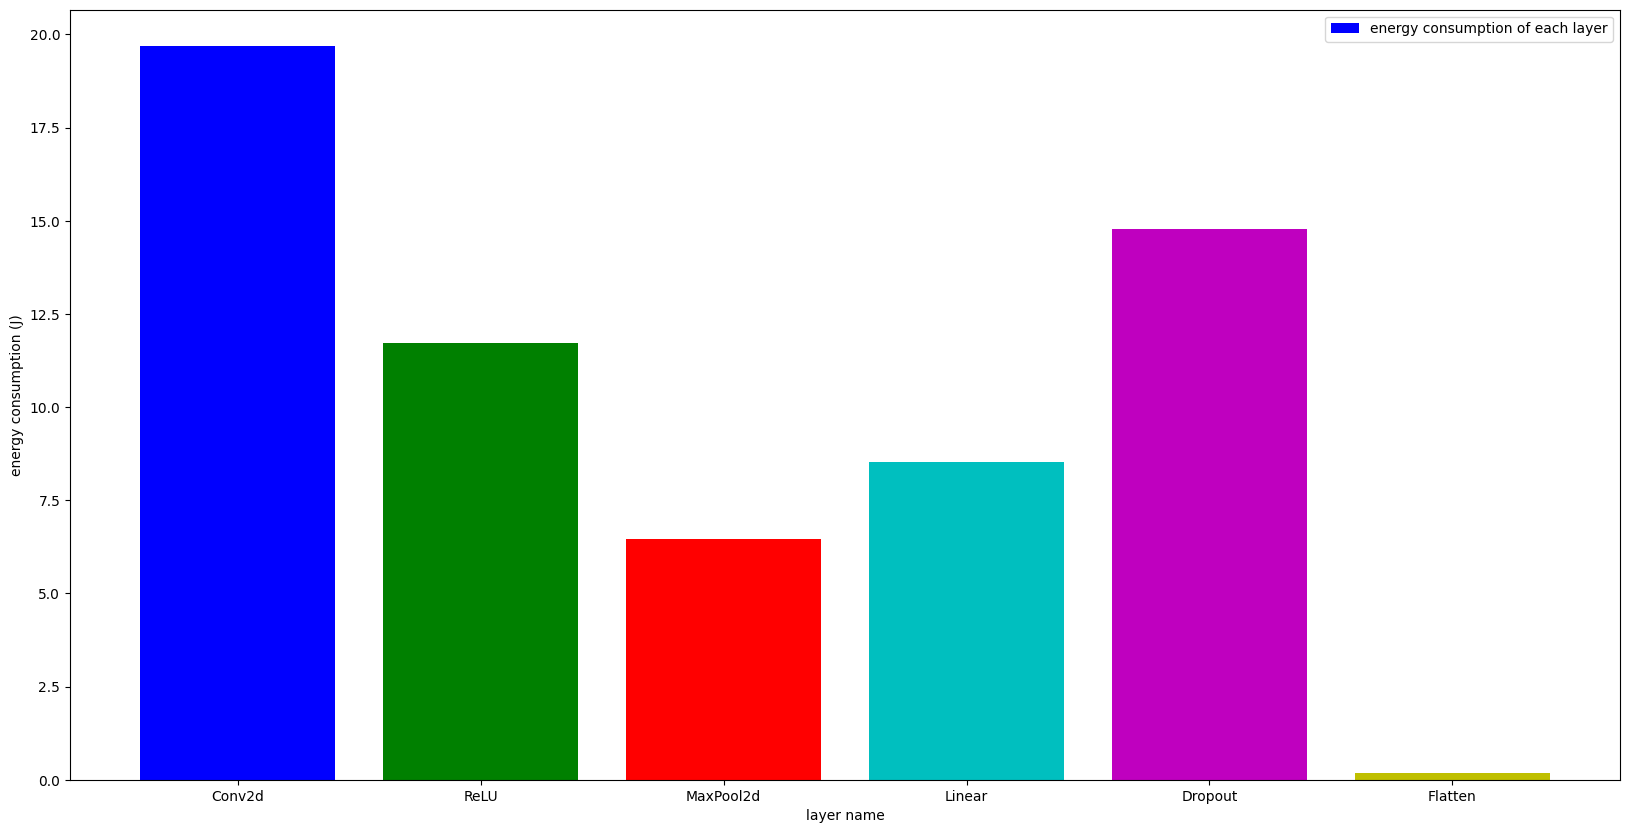

In [20]:
# plot the results
# x axis is the list_layer_name and the 
x = list_layer_name
# print(x)
# y axis
y = time_energy_data_np[epoch,:,1]
# print(y)
# plot the bar chart using different colors
plt.figure(figsize=(20,10))
# plt.bar(x, y, label='energy consumption of each layer')
plt.bar(x, y, label='energy consumption of each layer', color=['b','g','r','c','m','y'])
plt.xlabel('layer name')
plt.ylabel('energy consumption (J)')
plt.legend()
plt.show()


In [21]:
# calculate the total sumation of the energy consumption
total_energy_consumption_forward = np.sum(time_energy_data_np[epoch,:,1])
print('the total energy consumption of forward is %f J' % (total_energy_consumption_forward))

the total energy consumption of forward is 61.343310 J


In [22]:
print(loss_energy_consumption)
print(backward_energy_consumption)
print(optimizer_energy_consumption)
print(total_energy_consumption_forward)

11.754903398180936
75.67514188709816
21.37857104951685
61.34331018299252


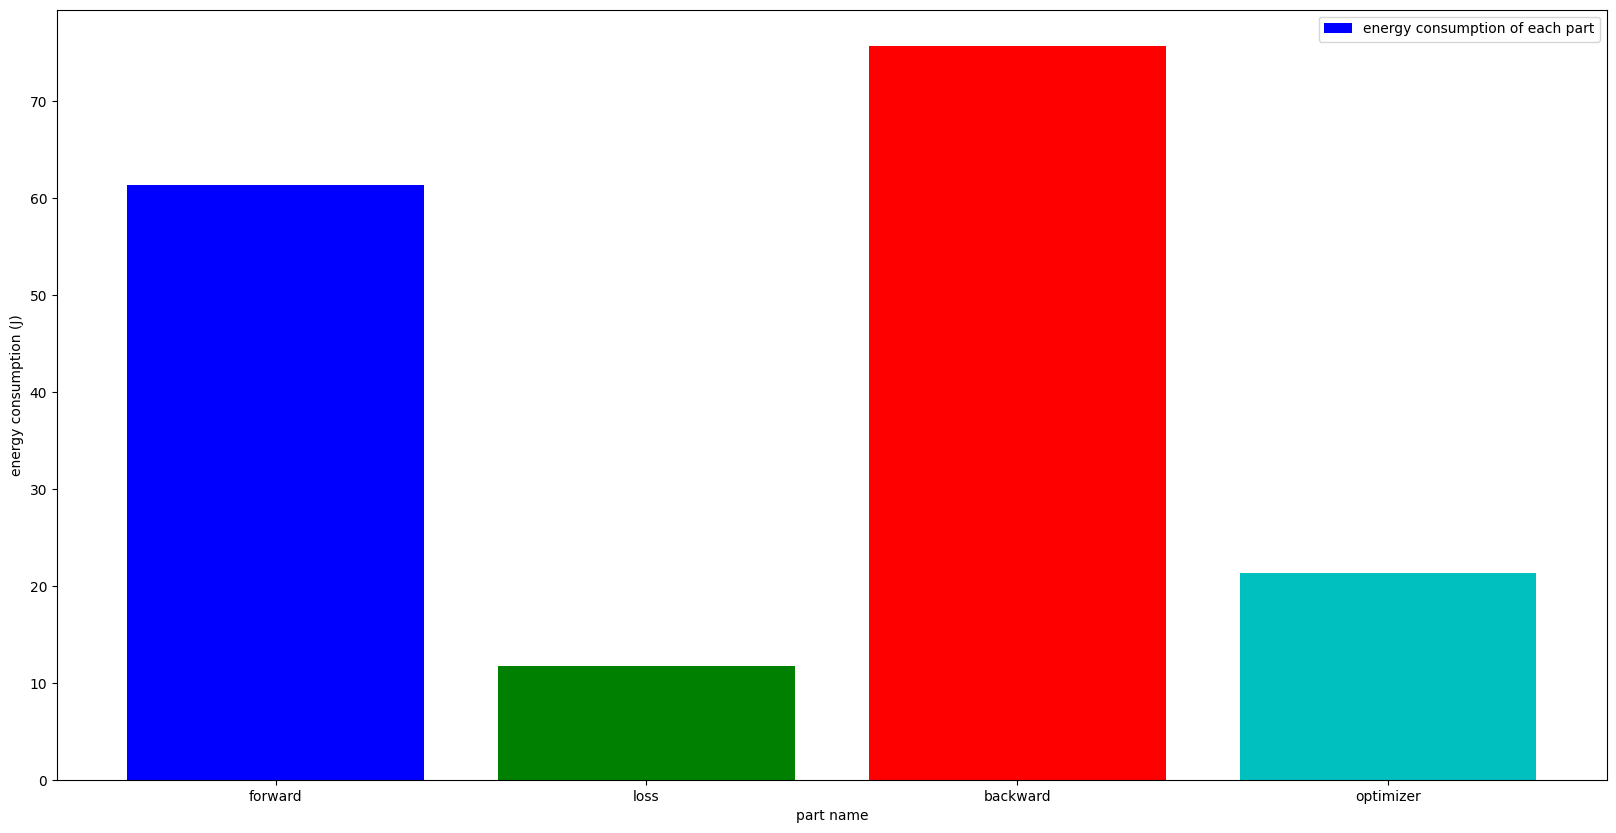

In [23]:
# plot the results of forward, loss, backward and optimizer
x = ['forward', 'loss', 'backward', 'optimizer']
y = [total_energy_consumption_forward, loss_energy_consumption, backward_energy_consumption, optimizer_energy_consumption]
plt.figure(figsize=(20,10))
plt.bar(x, y, label='energy consumption of each part', color=['b','g','r','c'])
plt.xlabel('part name')
plt.ylabel('energy consumption (J)')
plt.legend()
plt.show()